## Chapter 1. Exploratary Data Analysis

The key idea of this chapter to know how to explore your data ,clean it and Visualize<br>
And this is the first step in any data science project<br>
The focus in the book will be only on Structred data<br>

 <span class="dot"></span>
<span class="dot"></span>
<span class="dot"></span>
<span class="dot"></span> 

#### The Key Concepts:
- Estimate of Location
- Estimate of Variability
- Exploring the Data Distribution
- Exploring Binary and Categorical Data
- Exploring Two or More Variables

Import required Python packages

In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

Define data path 

In [4]:
BREAST_CANCER = 'data/mine/breast_cancer.csv'
HEART_FAILURE = 'data/mine/heart_failure.csv'
MEDICAL_INSURANCE = 'data/mine/insurance.csv'
TELCO_CUST_CHURN = 'data/mine/telco-churn.csv'

In [8]:
cancer_df= pd.read_csv(BREAST_CANCER)
heart_df = pd.read_csv(HEART_FAILURE)

In [7]:
pd.set_option('display.max_columns',34)
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Estimates of Location

In [9]:
heart_df['ejection_fraction'].mean()

38.08361204013378

In [10]:
trim_mean(heart_df['ejection_fraction'],0.1)

37.427385892116185

In [11]:
heart_df['ejection_fraction'].median()

38.0

Seeing that there in no difference between trim_mean, median and mean shows that there is no outliers as the mean is sensitive to outliers and unusual distributions<br>

If we want to compute the average Platelets in the blood (kiloplatelets/mL) for every year group we need to use weighted mean

In [22]:
heart_df['age'].describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [25]:
bins=[40, 50, 60, 70, 80 , 90]
heart_df['age'] = [bins[int((x%10)-4)] for x in heart_df['age']]

In [28]:
heart_df.age.value_counts()

60    109
50     81
80     46
90     35
70     20
40      8
Name: age, dtype: int64

In [29]:
heart_df['platelets'].mean()

263358.02926421416

In [30]:
np.average(heart_df['platelets'],weights=heart_df['age'])

262076.0263061651

In [31]:
wquantiles.median(heart_df['platelets'], weights=heart_df['age'])

259818.18181818182

## Estimates of Variability

Standard deviation

In [32]:
heart_df['ejection_fraction'].std()

11.834840741039173

Interquartile range is calculated as the difference of the 75% and 25% quantile. 

In [36]:
heart_df['ejection_fraction'].quantile(0.75)-heart_df['ejection_fraction'].quantile(0.25)

15.0

## Percentiles and Boxplots

In [37]:
plt.style.use('fivethirtyeight')

In [38]:
cancer_df['radius_mean'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05     9.5292
0.25    11.7000
0.50    13.3700
0.75    15.7800
0.95    20.5760
Name: radius_mean, dtype: float64

Text(0.5, 1.0, 'radius mean')

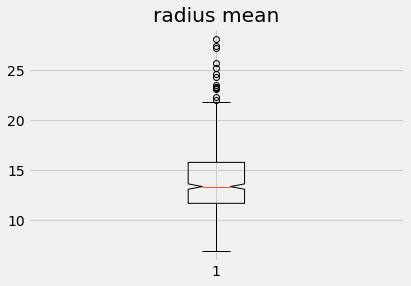

In [53]:
fig,ax1=plt.subplots()
ax1.boxplot(cancer_df['radius_mean'],notch=True)
ax1.set_title('radius mean')

## Histograms

Text(0.5, 0, 'radius_mean')

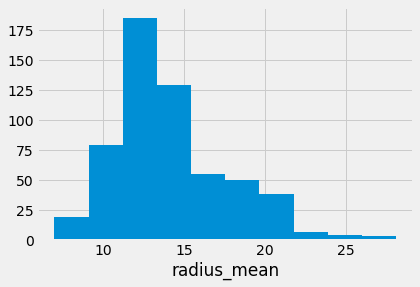

In [55]:
plt.hist(cancer_df['radius_mean'])
plt.xlabel('radius_mean')

## Density Estimates

Density is an alternative to histograms that can provide more insight into the distribution of the data points

C:\AncondaPath\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radius_mean', ylabel='Density'>

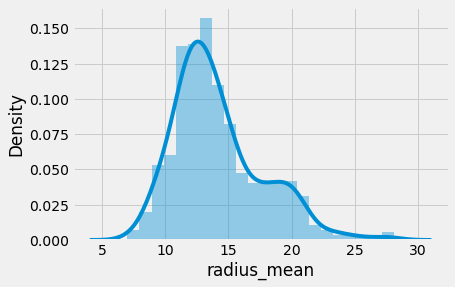

In [58]:
sns.distplot(cancer_df['radius_mean'])

As shown there is skewness to the right

## Exploring Binary and Categorical Data


- Binary Data

Text(0.5, 1.0, 'The diagnosis of breast tissues ')

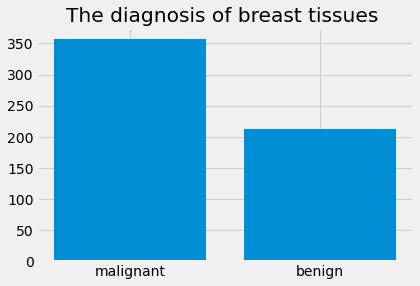

In [68]:
#cancer_df['diagnosis'].value_counts()
plt.bar(['malignant', 'benign'],cancer_df['diagnosis'].value_counts())
plt.title('The diagnosis of breast tissues ')

- Categorical Data

In [69]:
insurance_df=pd.read_csv(MEDICAL_INSURANCE)

In [71]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [74]:
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Text(0.5, 1.0, 'Region')

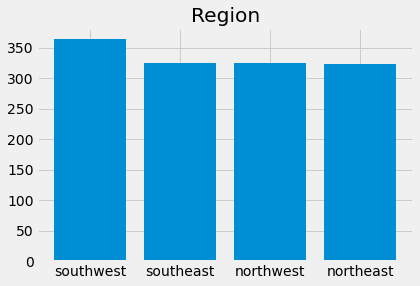

In [76]:
plt.bar(insurance_df['region'].unique(),insurance_df['region'].value_counts())
plt.title('Region')

## Correlation

The correlation coefficient is between -1 and 1 but a better way to visualize is it using heatmap using seaborn

<AxesSubplot:>

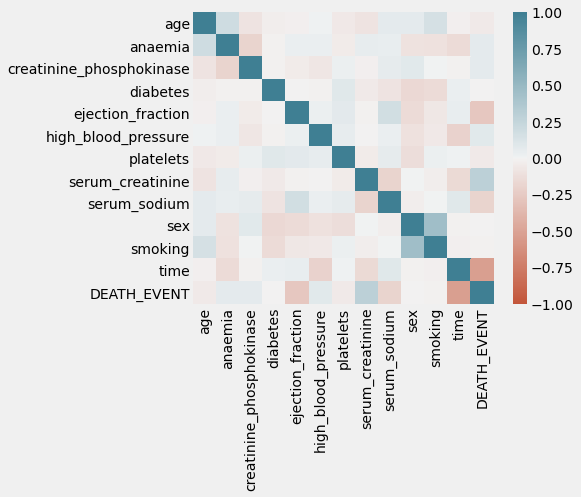

In [84]:
fig,ax2= plt.subplots(figsize=(6,5))
sns.heatmap(heart_df.corr(),vmax=1,vmin=-1,cmap=sns.diverging_palette(20, 220, as_cmap=True),ax=ax2)

The diagonal is the correlation between the variable and itself so its always 1 and the off-diagonal triangles are redundant(the triangle below equals the triangle above)

## Scatter Plot

Is a way to visualize the relation between two numeric variables

<AxesSubplot:>

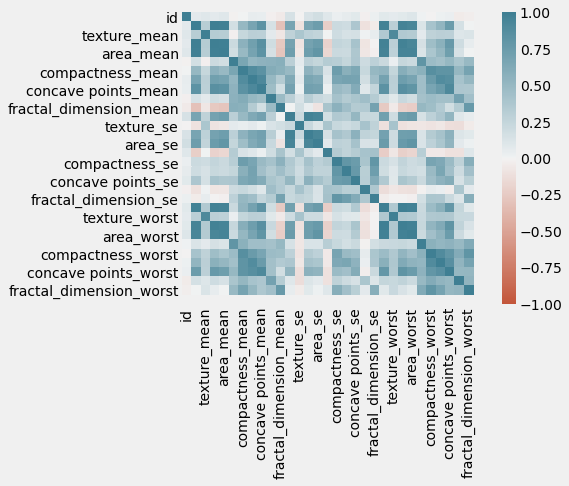

In [103]:
fig,ax3= plt.subplots(figsize=(6,5))
sns.heatmap(cancer_df.corr(),vmax=1,vmin=-1,cmap=sns.diverging_palette(20, 220, as_cmap=True),ax=ax3)

from the heatmap we can see that the area_mean and area_worst have positive correlation so start to visualize it with scatter plot

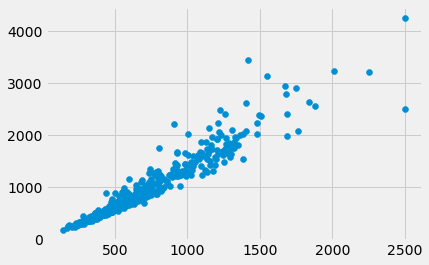

In [100]:
plt.scatter(cancer_df['area_mean'],cancer_df['area_worst'])

## Multiple Variables

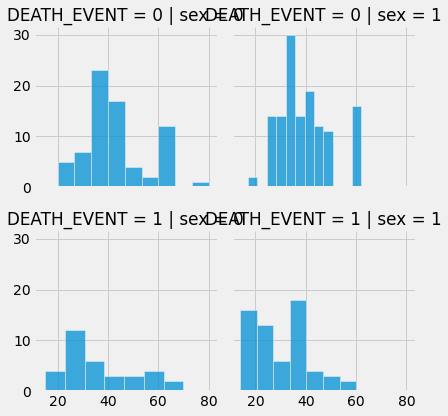

In [117]:
g = sns.FacetGrid(heart_df, col="sex", row="DEATH_EVENT")
g.map_dataframe(sns.histplot, x="ejection_fraction")